In [2]:
#import necessary libaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

C:\Users\king\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
#reading the file
fb= pd.read_csv(r"D:\self study\regression\uci-facebook-metrics\dataset_Facebook.csv", sep = ";")
#dropping the first unnecessary rows
fb = fb.iloc[1: ]

In [4]:
#count of number of empty cells
fb.isna().sum()
#since there are few empty cells so just dropping it
fb = fb.dropna(axis = 0, how = "any")

In [5]:
#column names and their respective datatype
for columns in fb.columns:
    print(columns, fb[columns].dtype.name)

Page total likes int64
Type object
Category int64
Post Month int64
Post Weekday int64
Post Hour int64
Paid float64
Lifetime Post Total Reach int64
Lifetime Post Total Impressions int64
Lifetime Engaged Users int64
Lifetime Post Consumers int64
Lifetime Post Consumptions int64
Lifetime Post Impressions by people who have liked your Page int64
Lifetime Post reach by people who like your Page int64
Lifetime People who have liked your Page and engaged with your post int64
comment int64
like float64
share float64
Total Interactions int64


In [6]:
# unique values in category, type   and paid 
fb.Category.unique()
fb.Type.unique()
fb.Paid.unique()

fb[["Category"]] = fb[["Category"]].astype('category')
fb[["Type"]] = fb[["Type"]].astype('category')
fb[["Paid"]] = fb[["Paid"]].astype('category')

In [7]:
#exploratory data analysis
fb.describe()

,Page total likes,Post Month,Post Weekday,Post Hour,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
count,494.000000,494.000000,494.000000,494.000000,494.000000,4.940000e+02,494.000000,494.000000,494.000000,4.940000e+02,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000
mean,123140.338057,7.018219,4.133603,7.854251,14050.927126,2.990712e+04,928.346154,805.562753,1428.485830,1.694429e+04,6651.479757,615.137652,7.564777,179.348178,27.285425,214.198381
std,16203.654603,3.300020,2.032785,4.384073,22838.526218,7.721303e+04,988.137964,885.527332,2008.886782,6.013168e+04,7704.773543,614.563785,21.295345,324.709626,42.697121,382.029800
min,81370.000000,1.000000,1.000000,1.000000,238.000000,5.700000e+02,9.000000,9.000000,9.000000,5.670000e+02,236.000000,9.000000,0.000000,0.000000,0.000000,0.000000
25%,111972.000000,4.000000,2.000000,3.000000,3332.500000,5.801000e+03,403.500000,335.000000,513.000000,4.103500e+03,2222.500000,298.500000,1.000000,57.000000,10.000000,72.000000
50%,129600.000000,7.000000,4.000000,9.000000,5291.000000,9.091000e+03,630.000000,555.500000,861.500000,6.283500e+03,3485.000000,416.500000,3.000000,101.500000,19.000000,125.000000
75%,136393.000000,10.000000,6.000000,11.000000,13264.000000,2.252050e+04,1062.000000,972.000000,1484.000000,1.518150e+04,8025.000000,659.250000,7.000000,188.000000,32.750000,231.500000
max,139441.000000,12.000000,7.000000,23.000000,180480.000000,1.110282e+06,11452.000000,11328.000000,19779.000000,1.107833e+06,51456.000000,4376.000000,372.000000,5172.000000,790.000000,6334.000000


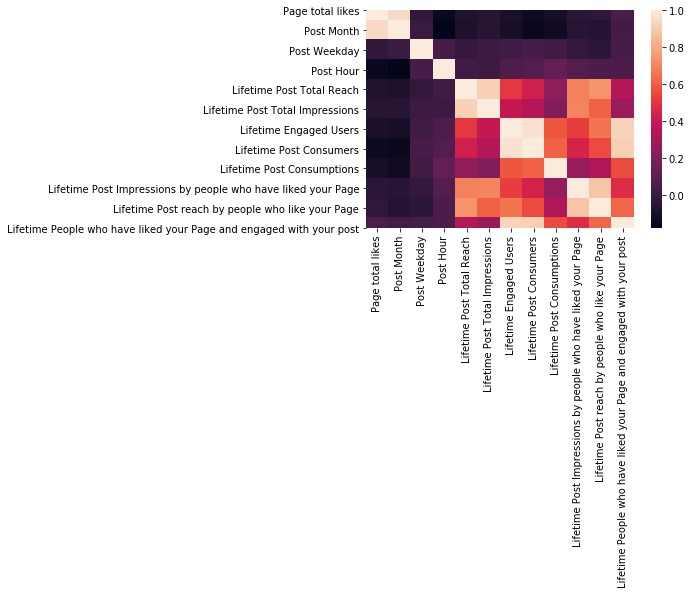

In [16]:
##categorical variable and numerical variable
#since total interaction is calculated from comment, share, like
#so dropping these columns
categorical_var = fb[["Category","Type","Paid"]]
numerical_var = fb.drop(["Category","Type","Paid","comment","share","like","Total Interactions"], axis = 1)
sns.heatmap(numerical_var.corr())

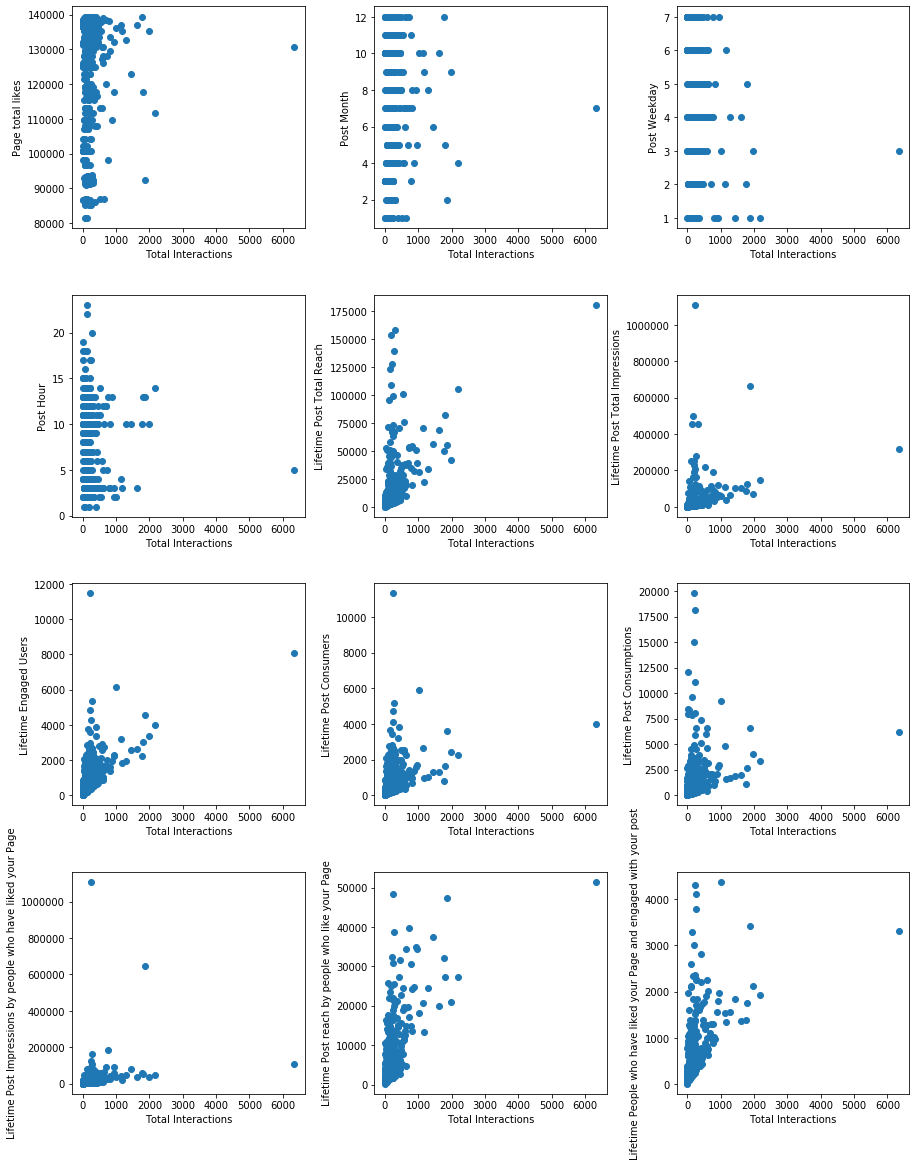

In [9]:
# scatter plot.. for numerical variable
fig = plt.figure(figsize = (15,20))
plt.subplots_adjust(hspace = .3, wspace= .3)
index_ = 1
for i in range(1,len(numerical_var.columns)+1):
    plt.subplot(4,3,index_)
    plt.scatter(fb['Total Interactions'], numerical_var.iloc[:, i - 1])
    plt.xlabel("Total Interactions")
    plt.ylabel(numerical_var.columns[i - 1])
    index_ = index_ + 1

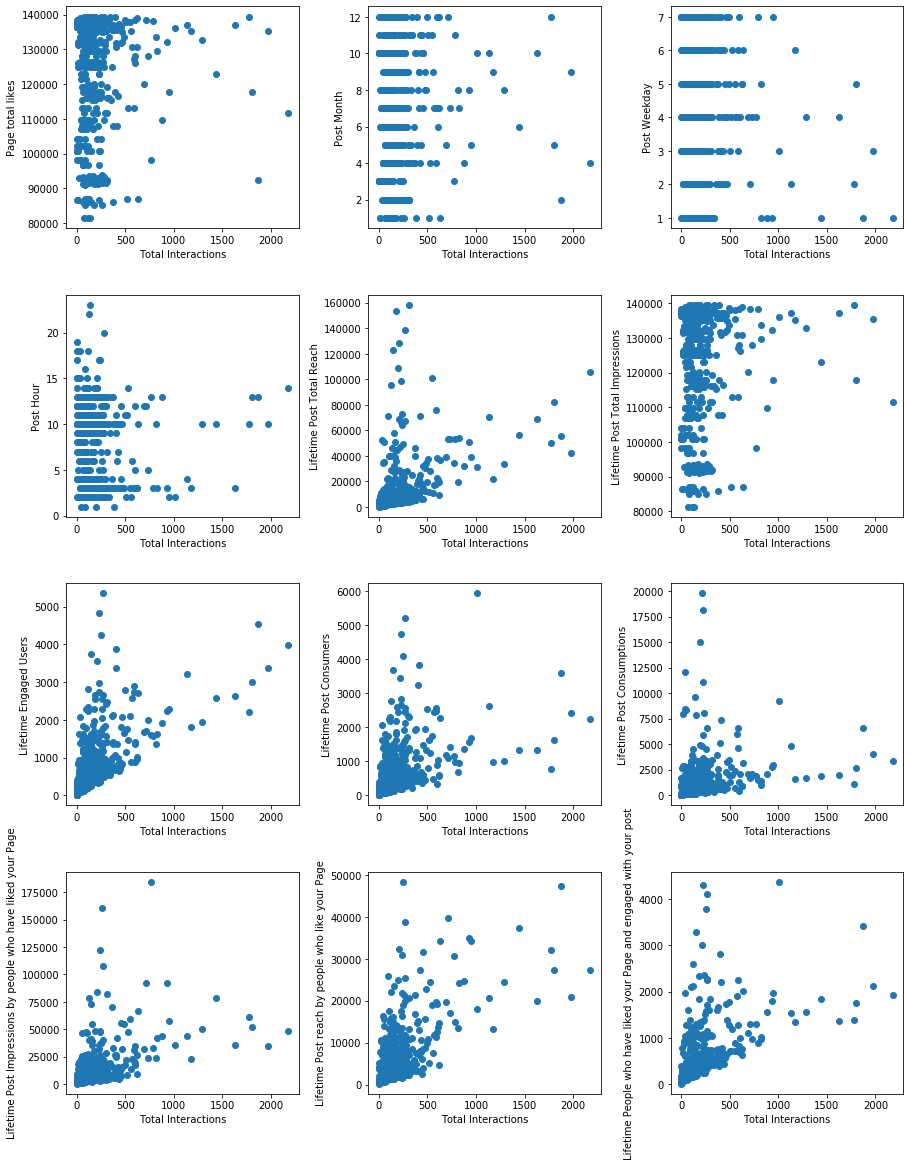

In [10]:
# deleting anamolies
fb.iloc[:,18] = fb[fb.iloc[:,18] < 4000] 
numerical_var.iloc[:, 5] = numerical_var[numerical_var.iloc[:, 5] < 600000]
numerical_var.iloc[:,6] = numerical_var[numerical_var.iloc[:, 6] < 6000]
numerical_var.iloc[:,7] = numerical_var[numerical_var.iloc[:, 7] < 6000]
numerical_var.iloc[:,9] = numerical_var[numerical_var.iloc[:, 9] < 400000]
fig = plt.figure(figsize = (15,20))
plt.subplots_adjust(hspace = .3, wspace= .3)
index_ = 1
for i in range(1,len(numerical_var.columns)+1):
    plt.subplot(4,3,index_)
    plt.scatter(fb['Total Interactions'], numerical_var.iloc[:, i - 1])
    plt.xlabel("Total Interactions")
    plt.ylabel(numerical_var.columns[i - 1])
    index_ = index_ + 1

In [12]:
#implementing the same changes in the 
fb.iloc[:, 8] = fb[fb.iloc[:, 8] < 600000] #lifetime post total imperrisions
fb.iloc[:,9] = fb[fb.iloc[:, 9] < 6000] #lifetime engaged users
fb.iloc[:,10] = fb[fb.iloc[:, 10] < 6000] #lifetime post comments
fb.iloc[:,12] = fb[fb.iloc[:, 12] < 400000] #lifetime post imperrisions by people who have....

In [13]:
print(fb.isna().sum())
fb = fb.dropna(axis = 0, how = "any")

Page total likes                                                       0
Type                                                                   0
Category                                                               0
Post Month                                                             0
Post Weekday                                                           0
Post Hour                                                              0
Paid                                                                   0
Lifetime Post Total Reach                                              0
Lifetime Post Total Impressions                                        2
Lifetime Engaged Users                                                 3
Lifetime Post Consumers                                                1
Lifetime Post Consumptions                                             0
Lifetime Post Impressions by people who have liked your Page           2
Lifetime Post reach by people who like your Page   

In [14]:
print(fb.isna().sum())

Page total likes                                                       0
Type                                                                   0
Category                                                               0
Post Month                                                             0
Post Weekday                                                           0
Post Hour                                                              0
Paid                                                                   0
Lifetime Post Total Reach                                              0
Lifetime Post Total Impressions                                        0
Lifetime Engaged Users                                                 0
Lifetime Post Consumers                                                0
Lifetime Post Consumptions                                             0
Lifetime Post Impressions by people who have liked your Page           0
Lifetime Post reach by people who like your Page   

In [15]:
fb.to_csv('fb_clean_eda.csv')